# Imports

In [1]:
import numpy as np
import pandas as pd
import pyshark
import matplotlib.pyplot as plt
import json # original json library
import logging

### Log setup

In [2]:
LOG_FILENAME = '/home/benjamin/Folders_Python/Cyber/logs/logfile.log'
LOG_FORMAT = '%(asctime)% -- %(name)s -- %(levelname)s -- %(message)s'
# LOG_LEVEL = logging.INFO

# specific logger for the module
logger = logging.getLogger(__name__)   # creates specific logger for the module
logger.setLevel(logging.DEBUG)    # entry level of messages from all handlers
LOG_FORMAT = '%(asctime)s -- %(name)s -- %(levelname)s -- %(message)s'
formatter = logging.Formatter(LOG_FORMAT)

# file handler to log everything
file_handler = logging.FileHandler(LOG_FILENAME, mode='w')
file_handler.setLevel(logging.DEBUG)  # all messages (DEBUG and up) get logged in the file
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

# stream handler to show messages to the console
console = logging.StreamHandler()
console.setLevel(logging.WARNING)  # Warning messages and up get displayed to the console
console.setFormatter(formatter)
logger.addHandler(console)

# start your engine
logger.info("-------- new run traitement dataframes--------")

### Load dataframe

In [3]:
# need to run toy_pyshark.ipynb to create the pickle smallFlows.pcap.pkl

DIRDATAFRAMES = '/home/benjamin/Folders_Python/Cyber/data/dataframes/'
# dfname = 'smallFlows.pcap.pkl'
dfname = 'css.pcap.pkl'

In [4]:
filename = DIRDATAFRAMES + dfname
df = pd.read_pickle(filename)

In [5]:
df

,ETH_dst,ETH_src,ETH_type,IP_version,IP_hdr_len,IP_len,IP_id,IP_flags,IP_ttl,IP_proto,...,TCP_stream,TCP_len,TCP_seq,TCP_ack,TCP_hdr_len,TCP_flags,TCP_time_relative,TCP_time_delta,TCP_payload,TIMESTAMP_ts
0,00:50:56:90:19:42,00:50:56:90:ca:b0,0x0800,4,20,60,0xed8c,0x02,64,6,...,0,0,0,0,40,0x0002,0.000000000,0.000000000,None,2024-02-19 10:36:55.868842
1,00:50:56:90:ca:b0,00:50:56:90:19:42,0x0800,4,20,40,0x0000,0x02,64,6,...,0,0,1,1,20,0x0014,0.000021000,0.000021000,None,2024-02-19 10:36:55.868863
2,00:50:56:90:19:42,00:50:56:90:ca:b0,0x0800,4,20,60,0xfe6e,0x02,64,6,...,1,0,0,0,40,0x0002,0.000000000,0.000000000,None,2024-02-19 10:36:55.911426
3,00:50:56:90:ca:b0,00:50:56:90:19:42,0x0800,4,20,40,0x0000,0x02,64,6,...,1,0,1,1,20,0x0014,0.000021000,0.000021000,None,2024-02-19 10:36:55.911447
4,00:50:56:90:19:42,00:50:56:90:ca:b0,0x0800,4,20,60,0x2e1a,0x02,64,6,...,2,0,0,0,40,0x0002,0.000000000,0.000000000,None,2024-02-19 10:37:25.880844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,00:50:56:90:ca:b0,00:50:56:90:19:42,0x0800,4,20,52,0xd31f,0x02,64,6,...,6,0,203113,66,32,0x0011,186.027156000,0.015473000,None,2024-02-19 10:47:05.163625
1632,00:50:56:90:19:42,00:50:56:90:ca:b0,0x0800,4,20,52,0x4188,0x02,64,6,...,6,0,66,203114,32,0x0010,186.027493000,0.000337000,None,2024-02-19 10:47:05.163962
1633,00:50:56:90:19:42,00:50:56:90:ca:b0,0x0800,4,20,52,0x0ac7,0x02,64,6,...,7,0,3301,1321,32,0x0011,186.072459000,0.566620000,None,2024-02-19 10:47:05.248661
1634,00:50:56:90:ca:b0,00:50:56:90:19:42,0x0800,4,20,52,0x3ac4,0x02,64,6,...,7,0,1321,3302,32,0x0011,186.087745000,0.015286000,None,2024-02-19 10:47:05.263947


In [6]:
df.describe(include='all').transpose()

/tmp/ipykernel_5675/4214053870.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').transpose()


,count,unique,top,freq,first,last
ETH_dst,1636,2,00:50:56:90:19:42,822,NaT,NaT
ETH_src,1636,2,00:50:56:90:ca:b0,822,NaT,NaT
ETH_type,1636,1,0x0800,1636,NaT,NaT
IP_version,1636,1,4,1636,NaT,NaT
IP_hdr_len,1636,1,20,1636,NaT,NaT
IP_len,1636,7,52,912,NaT,NaT
IP_id,1636,1629,0x0000,8,NaT,NaT
IP_flags,1636,1,0x02,1636,NaT,NaT
IP_ttl,1636,1,64,1636,NaT,NaT
IP_proto,1636,1,6,1636,NaT,NaT


In [7]:
df.columns

Index(['ETH_dst', 'ETH_src', 'ETH_type', 'IP_version', 'IP_hdr_len', 'IP_len',
       'IP_id', 'IP_flags', 'IP_ttl', 'IP_proto', 'IP_src', 'IP_dst',
       'TCP_srcport', 'TCP_dstport', 'TCP_stream', 'TCP_len', 'TCP_seq',
       'TCP_ack', 'TCP_hdr_len', 'TCP_flags', 'TCP_time_relative',
       'TCP_time_delta', 'TCP_payload', 'TIMESTAMP_ts'],
      dtype='object')

### Features recast sur dataframe

In [11]:
# transforms variables into right type

columns_to_encode_as_ordinal = ['ETH_dst', 'ETH_src', 'ETH_type', 'IP_id', 'IP_flags', 'IP_src', 'IP_dst', 'TCP_flags']

columns_to_cast_as_float = ['IP_version', 'IP_hdr_len', 'IP_len', 'IP_ttl', 'IP_proto',
                            'TCP_srcport', 'TCP_dstport', 'TCP_stream', 'TCP_len', 'TCP_seq',
                            'TCP_ack', 'TCP_hdr_len', 'TCP_time_relative', 'TCP_time_delta',
                            # 'UDP_srcport', 'UDP_dstport', 'UDP_length', 'UDP_stream',
                            # 'UDP_time_relative', 'UDP_time_delta'
                            ]

columns_to_cast_as_datetime = ['TIMESTAMP_ts']

columns_to_discard = ['TCP_payload','UDP_payload']

In [12]:
df_ord = pd.DataFrame()

for c in columns_to_encode_as_ordinal:
    df1, uniques = pd.factorize(df[c])
    df_sup = pd.DataFrame(data={ c : list(df1) })
    df_ord = pd.concat([df_ord, df_sup], axis=1)

In [13]:
df_float = df[columns_to_cast_as_float].astype('float')

In [14]:
df[columns_to_cast_as_datetime].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TIMESTAMP_ts  1636 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 12.9 KB


In [15]:
df_ts = df[columns_to_cast_as_datetime]

In [16]:
df_recast = pd.concat([df_ord, df_float, df_ts], axis=1)
df_recast.set_index('TIMESTAMP_ts')

,ETH_dst,ETH_src,ETH_type,IP_id,IP_flags,IP_src,IP_dst,TCP_flags,IP_version,IP_hdr_len,...,IP_proto,TCP_srcport,TCP_dstport,TCP_stream,TCP_len,TCP_seq,TCP_ack,TCP_hdr_len,TCP_time_relative,TCP_time_delta
TIMESTAMP_ts,,,,,,,,,,,,,,,,,,,,,
2024-02-19 10:36:55.868842,0,0,0,0,0,0,0,0,4.0,20.0,...,6.0,45072.0,18050.0,0.0,0.0,0.0,0.0,40.0,0.000000,0.000000
2024-02-19 10:36:55.868863,1,1,0,1,0,1,1,1,4.0,20.0,...,6.0,18050.0,45072.0,0.0,0.0,1.0,1.0,20.0,0.000021,0.000021
2024-02-19 10:36:55.911426,0,0,0,2,0,0,0,0,4.0,20.0,...,6.0,42808.0,18051.0,1.0,0.0,0.0,0.0,40.0,0.000000,0.000000
2024-02-19 10:36:55.911447,1,1,0,1,0,1,1,1,4.0,20.0,...,6.0,18051.0,42808.0,1.0,0.0,1.0,1.0,20.0,0.000021,0.000021
2024-02-19 10:37:25.880844,0,0,0,3,0,0,0,0,4.0,20.0,...,6.0,35847.0,18050.0,2.0,0.0,0.0,0.0,40.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19 10:47:05.163625,1,1,0,1624,0,1,1,5,4.0,20.0,...,6.0,18050.0,39015.0,6.0,0.0,203113.0,66.0,32.0,186.027156,0.015473
2024-02-19 10:47:05.163962,0,0,0,1625,0,0,0,3,4.0,20.0,...,6.0,39015.0,18050.0,6.0,0.0,66.0,203114.0,32.0,186.027493,0.000337
2024-02-19 10:47:05.248661,0,0,0,1626,0,0,0,5,4.0,20.0,...,6.0,46062.0,18051.0,7.0,0.0,3301.0,1321.0,32.0,186.072459,0.566620


In [17]:
df_recast.describe(include='all').transpose()

/tmp/ipykernel_5675/1582047227.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_recast.describe(include='all').transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ETH_dst,1636.0,NaN,NaT,NaN,NaT,NaT,0.497555,0.500147,0.0,0.0,0.0,1.0,1.0
ETH_src,1636.0,NaN,NaT,NaN,NaT,NaT,0.497555,0.500147,0.0,0.0,0.0,1.0,1.0
ETH_type,1636.0,NaN,NaT,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IP_id,1636.0,NaN,NaT,NaN,NaT,NaT,810.521394,472.380021,0.0,401.75,810.5,1219.25,1628.0
IP_flags,1636.0,NaN,NaT,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IP_src,1636.0,NaN,NaT,NaN,NaT,NaT,0.497555,0.500147,0.0,0.0,0.0,1.0,1.0
IP_dst,1636.0,NaN,NaT,NaN,NaT,NaT,0.497555,0.500147,0.0,0.0,0.0,1.0,1.0
TCP_flags,1636.0,NaN,NaT,NaN,NaT,NaT,3.420538,0.576115,0.0,3.0,3.0,4.0,5.0
IP_version,1636.0,NaN,NaT,NaN,NaT,NaT,4.0,0.0,4.0,4.0,4.0,4.0,4.0
IP_hdr_len,1636.0,NaN,NaT,NaN,NaT,NaT,20.0,0.0,20.0,20.0,20.0,20.0,20.0


In [18]:
df_recast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ETH_dst            1636 non-null   int64         
 1   ETH_src            1636 non-null   int64         
 2   ETH_type           1636 non-null   int64         
 3   IP_id              1636 non-null   int64         
 4   IP_flags           1636 non-null   int64         
 5   IP_src             1636 non-null   int64         
 6   IP_dst             1636 non-null   int64         
 7   TCP_flags          1636 non-null   int64         
 8   IP_version         1636 non-null   float64       
 9   IP_hdr_len         1636 non-null   float64       
 10  IP_len             1636 non-null   float64       
 11  IP_ttl             1636 non-null   float64       
 12  IP_proto           1636 non-null   float64       
 13  TCP_srcport        1636 non-null   float64       
 14  TCP_dstp

In [22]:
# just TCP

df_tcp = df_recast.dropna(subset=['TCP_time_relative'])
# df_tcp.drop(columns=['UDP_srcport', 'UDP_dstport', 'UDP_length', 'UDP_stream', 'UDP_time_relative', 'UDP_time_delta'], inplace=True)

In [23]:
df_tcp

,ETH_dst,ETH_src,ETH_type,IP_id,IP_flags,IP_src,IP_dst,TCP_flags,IP_version,IP_hdr_len,...,TCP_srcport,TCP_dstport,TCP_stream,TCP_len,TCP_seq,TCP_ack,TCP_hdr_len,TCP_time_relative,TCP_time_delta,TIMESTAMP_ts
0,0,0,0,0,0,0,0,0,4.0,20.0,...,45072.0,18050.0,0.0,0.0,0.0,0.0,40.0,0.000000,0.000000,2024-02-19 10:36:55.868842
1,1,1,0,1,0,1,1,1,4.0,20.0,...,18050.0,45072.0,0.0,0.0,1.0,1.0,20.0,0.000021,0.000021,2024-02-19 10:36:55.868863
2,0,0,0,2,0,0,0,0,4.0,20.0,...,42808.0,18051.0,1.0,0.0,0.0,0.0,40.0,0.000000,0.000000,2024-02-19 10:36:55.911426
3,1,1,0,1,0,1,1,1,4.0,20.0,...,18051.0,42808.0,1.0,0.0,1.0,1.0,20.0,0.000021,0.000021,2024-02-19 10:36:55.911447
4,0,0,0,3,0,0,0,0,4.0,20.0,...,35847.0,18050.0,2.0,0.0,0.0,0.0,40.0,0.000000,0.000000,2024-02-19 10:37:25.880844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,1,1,0,1624,0,1,1,5,4.0,20.0,...,18050.0,39015.0,6.0,0.0,203113.0,66.0,32.0,186.027156,0.015473,2024-02-19 10:47:05.163625
1632,0,0,0,1625,0,0,0,3,4.0,20.0,...,39015.0,18050.0,6.0,0.0,66.0,203114.0,32.0,186.027493,0.000337,2024-02-19 10:47:05.163962
1633,0,0,0,1626,0,0,0,5,4.0,20.0,...,46062.0,18051.0,7.0,0.0,3301.0,1321.0,32.0,186.072459,0.566620,2024-02-19 10:47:05.248661
1634,1,1,0,1627,0,1,1,5,4.0,20.0,...,18051.0,46062.0,7.0,0.0,1321.0,3302.0,32.0,186.087745,0.015286,2024-02-19 10:47:05.263947


In [24]:
df_tcp.set_index('TIMESTAMP_ts')

,ETH_dst,ETH_src,ETH_type,IP_id,IP_flags,IP_src,IP_dst,TCP_flags,IP_version,IP_hdr_len,...,IP_proto,TCP_srcport,TCP_dstport,TCP_stream,TCP_len,TCP_seq,TCP_ack,TCP_hdr_len,TCP_time_relative,TCP_time_delta
TIMESTAMP_ts,,,,,,,,,,,,,,,,,,,,,
2024-02-19 10:36:55.868842,0,0,0,0,0,0,0,0,4.0,20.0,...,6.0,45072.0,18050.0,0.0,0.0,0.0,0.0,40.0,0.000000,0.000000
2024-02-19 10:36:55.868863,1,1,0,1,0,1,1,1,4.0,20.0,...,6.0,18050.0,45072.0,0.0,0.0,1.0,1.0,20.0,0.000021,0.000021
2024-02-19 10:36:55.911426,0,0,0,2,0,0,0,0,4.0,20.0,...,6.0,42808.0,18051.0,1.0,0.0,0.0,0.0,40.0,0.000000,0.000000
2024-02-19 10:36:55.911447,1,1,0,1,0,1,1,1,4.0,20.0,...,6.0,18051.0,42808.0,1.0,0.0,1.0,1.0,20.0,0.000021,0.000021
2024-02-19 10:37:25.880844,0,0,0,3,0,0,0,0,4.0,20.0,...,6.0,35847.0,18050.0,2.0,0.0,0.0,0.0,40.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19 10:47:05.163625,1,1,0,1624,0,1,1,5,4.0,20.0,...,6.0,18050.0,39015.0,6.0,0.0,203113.0,66.0,32.0,186.027156,0.015473
2024-02-19 10:47:05.163962,0,0,0,1625,0,0,0,3,4.0,20.0,...,6.0,39015.0,18050.0,6.0,0.0,66.0,203114.0,32.0,186.027493,0.000337
2024-02-19 10:47:05.248661,0,0,0,1626,0,0,0,5,4.0,20.0,...,6.0,46062.0,18051.0,7.0,0.0,3301.0,1321.0,32.0,186.072459,0.566620


### PCA

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
X = df_tcp.to_numpy()[:,:-1].astype(float)
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA()
pca.fit(X)

PCA()

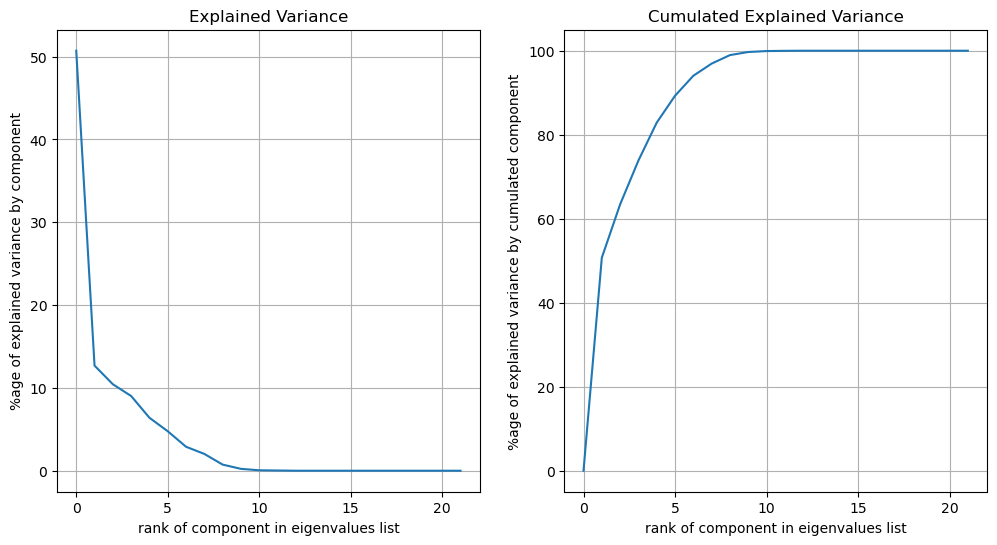

In [27]:
explained_variance_ratio = pca.explained_variance_ratio_
cumul_explained_variance_ratio = np.array([ np.sum(explained_variance_ratio[:i]) for i in range(len(explained_variance_ratio)) ])

c3 = cumul_explained_variance_ratio[3]

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(explained_variance_ratio*100)
ax[0].set_title('Explained Variance')
ax[0].set_xlabel('rank of component in eigenvalues list')
ax[0].set_ylabel("%age of explained variance by component")
ax[0].grid(True)

ax[1].plot(cumul_explained_variance_ratio*100)
ax[1].set_title('Cumulated Explained Variance')
ax[1].set_xlabel('rank of component in eigenvalues list')
ax[1].set_ylabel("%age of explained variance by cumulated component")
ax[1].grid(True)

### Some PCA

In [28]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [29]:
X_pca.shape

(1636, 3)

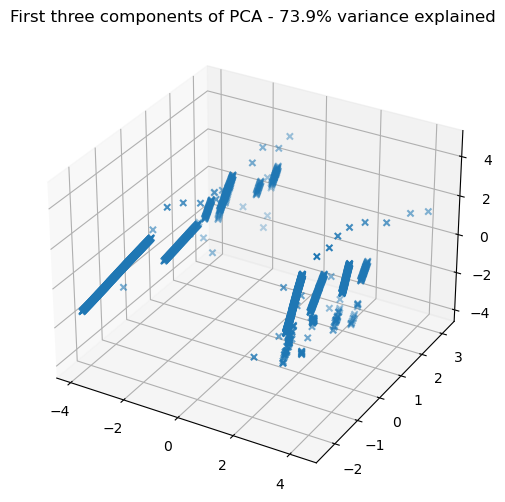

In [30]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(projection='3d')

ax.scatter( X_pca[:,0], X_pca[:,1], X_pca[:,2], marker='x' )
ax.set_title(f'First three components of PCA - {c3*100:.1f}% variance explained')
ax.grid(True)

### DBSCAN

In [31]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=.5, min_samples=10).fit(X_pca)
labels = db.labels_
unique_labels = set(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 11
Estimated number of noise points: 36


In [32]:
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [33]:
db

DBSCAN(min_samples=10)

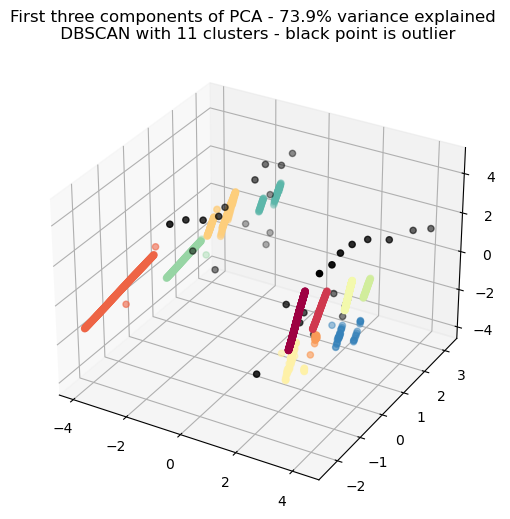

In [34]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
c = [ colors[labels[i]] if labels[i] >= 0 else [0,0,0,1] for i in range(len(labels)) ]

ax.scatter( X_pca[:,0], X_pca[:,1], X_pca[:,2], marker='o', color=c )
ax.set_title(f'First three components of PCA - {c3*100:.1f}% variance explained \n DBSCAN with {n_clusters_} clusters - black point is outlier')
ax.grid(True)